<a href="https://colab.research.google.com/github/MehrdadJalali-AI/InverseLinkPredcition/blob/main/Sparcification_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load edge list and features
edges_list_filename = 'sparsified_graph_edges_0.98.csv'
summary_data_filename = '1M1L3D_summary.csv'

edges_list = pd.read_csv(edges_list_filename, header=None, names=['source', 'target', 'weight'], delimiter=' ')
summary_data = pd.read_csv(summary_data_filename)

# Filter summary data based on edge list
node_labels = np.unique(np.concatenate((edges_list['source'], edges_list['target'])))

summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
summary_data_filtered['PLD_category'] = pd.cut(summary_data_filtered['Pore Limiting Diameter'], bins=[-np.inf, 2.4, 4.5, 8, np.inf], labels=['nonporous', 'small pore', 'medium pore', 'large pore'])
labels = pd.get_dummies(summary_data_filtered['PLD_category']).values
# Calculate percentage of each class label
class_labels = summary_data_filtered['PLD_category']
class_counts = class_labels.value_counts(normalize=True) * 100

# Plot percentage of each class label
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Each Class Label')
plt.xlabel('Class Label')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

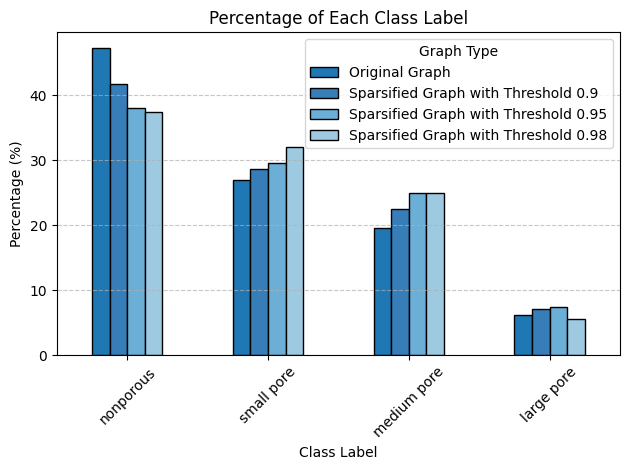

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Define the summary data file
summary_data_filename = '1M1L3D_summary.csv'

# Load summary data
summary_data = pd.read_csv(summary_data_filename)

# Define the dictionary of edge files
edge_files = {
    'Original Graph': 'edges_list_0.8_Full.csv',
    'Sparsified Graph with Threshold 0.9': 'sparsified_graph_edges_0.9.csv',
    'Sparsified Graph with Threshold 0.95': 'sparsified_graph_edges_0.95.csv',
    'Sparsified Graph with Threshold 0.98': 'sparsified_graph_edges_0.98.csv'
}

# Function to process each edge file
def process_edge_file(edge_file):
    # Load edge list
    edges_list = pd.read_csv(edge_file, header=None, names=['source', 'target', 'weight'], delimiter=' ')

    # Filter summary data based on edge list
    node_labels = np.unique(np.concatenate((edges_list['source'], edges_list['target'])))

    summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
    summary_data_filtered['PLD_category'] = pd.cut(summary_data_filtered['Pore Limiting Diameter'], bins=[-np.inf, 2.4, 4.5, 8, np.inf], labels=['nonporous', 'small pore', 'medium pore', 'large pore'])

    # Calculate percentage of each class label
    class_labels = summary_data_filtered['PLD_category']
    class_counts = class_labels.value_counts(normalize=True) * 100

    return class_counts

# Combine results from all edge files
combined_class_counts = pd.DataFrame()

for label, filename in edge_files.items():
    class_counts = process_edge_file(filename)
    combined_class_counts[label] = class_counts

# Define a custom color palette within the blue spectrum
colors = ['#1f77b4', '#377eb8', '#6baed6', '#9ecae1']

# Plot percentage of each class label with custom colors
plt.figure(figsize=(10, 6))
combined_class_counts.plot(kind='bar', edgecolor='black', color=colors)
plt.title('Percentage of Each Class Label')
plt.xlabel('Class Label')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Graph Type')
plt.tight_layout()
plt.show()


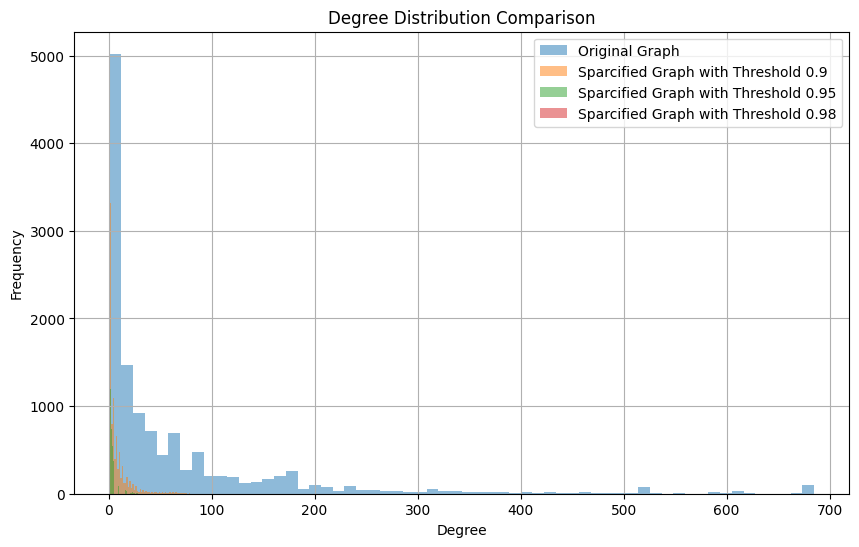

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Degree'], bins=60, alpha=0.5, label=label)

plt.title('Degree Distribution Comparison')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



<ipython-input-15-9ee4c9b284f5>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


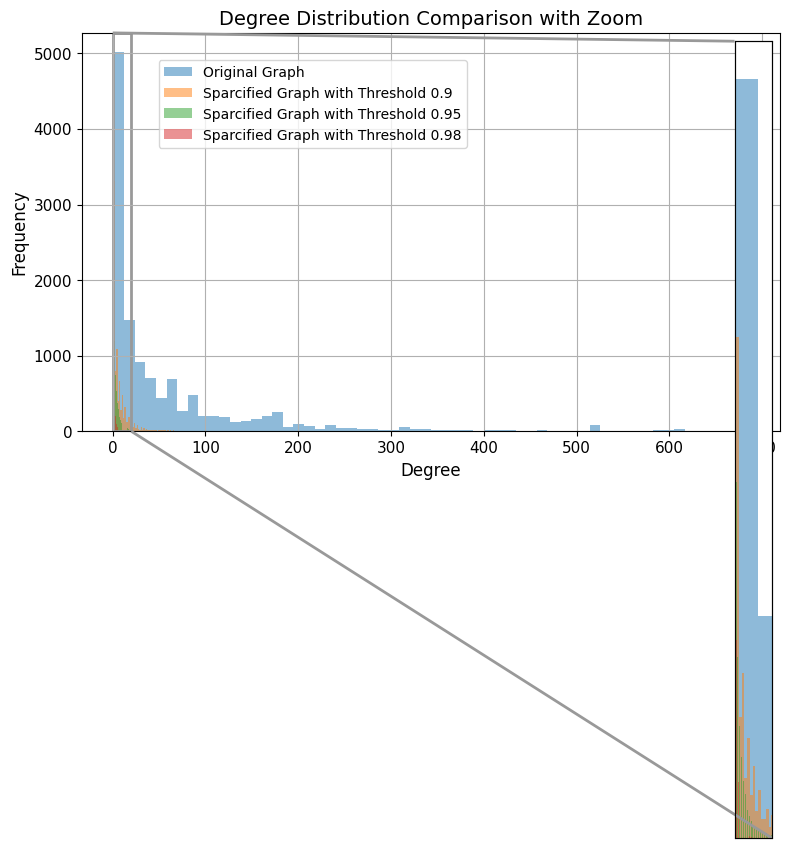

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# ✅ Create main figure
plt.figure(figsize=(8, 5))

ax = plt.axes()
ax.set_title('Degree Distribution Comparison with Zoom', fontsize=14)
ax.set_xlabel('Degree', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# ✅ Main Histogram
for label, filename in files.items():
    df = pd.read_csv(filename)
    ax.hist(df['Degree'], bins=60, alpha=0.5, label=label)

# ✅ Inset Zoom
axins = zoomed_inset_axes(ax, zoom=2, loc='upper right', borderpad=0.6)
for label, filename in files.items():
    df = pd.read_csv(filename)
    axins.hist(df['Degree'], bins=60, alpha=0.5)

# ✅ Customize inset limits based on your data distribution
axins.set_xlim(0, 20)   # <-- adjust this if needed based on your actual Degree range
axins.set_ylim(0, None) # auto y limit

# ✅ Remove x and y labels inside inset
axins.set_xticks([])
axins.set_yticks([])

# ✅ Inset border
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(0.8)

# ✅ Connector lines
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.6", linewidth=2)

# ✅ Legend nicely shifted left
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(0.1, 0.95))

ax.grid(True)
plt.tight_layout()
plt.show()


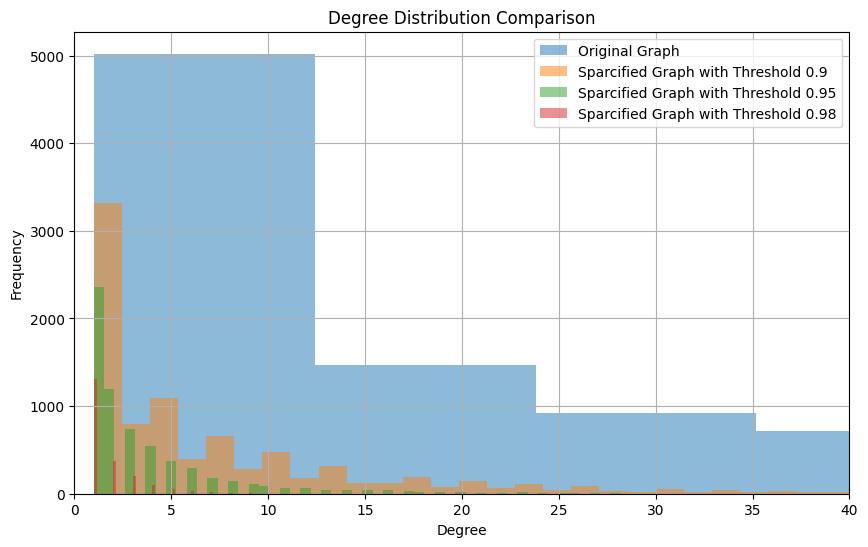

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Degree'], bins=60, alpha=0.5, label=label)

# Optional: Zoom into a specific range of degrees
plt.xlim(0, 40)  # Adjust this range based on your data

plt.title('Degree Distribution Comparison')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-18-5102492351c9>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


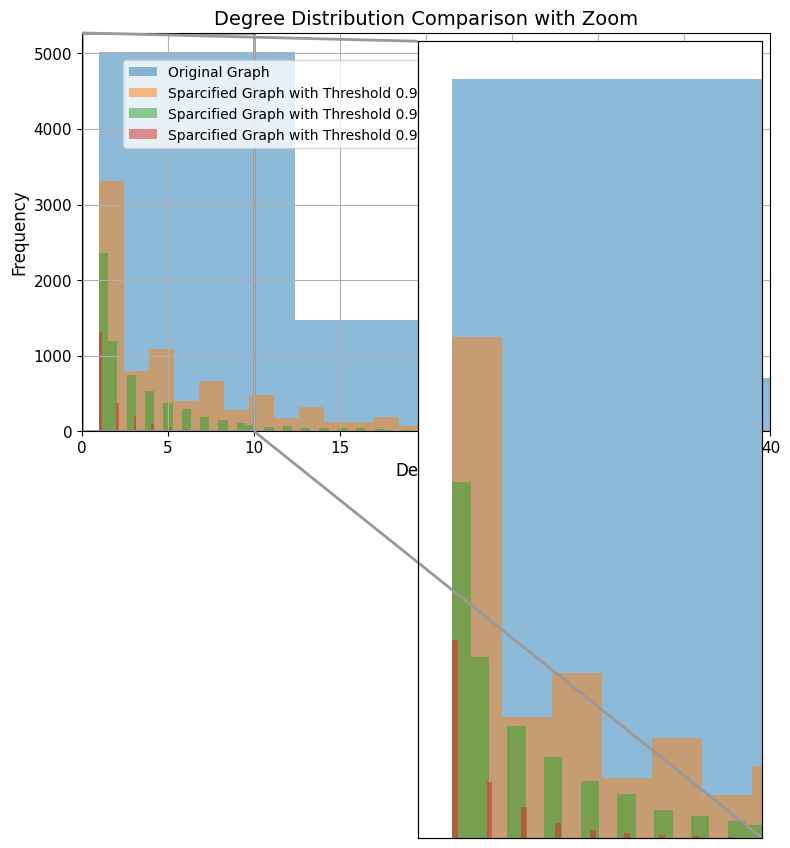

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# ✅ Create main figure
plt.figure(figsize=(8, 5))

ax = plt.axes()
ax.set_title('Degree Distribution Comparison with Zoom', fontsize=14)
ax.set_xlabel('Degree', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# ✅ Main Histogram
for label, filename in files.items():
    df = pd.read_csv(filename)
    ax.hist(df['Degree'], bins=60, alpha=0.5, label=label)

# ✅ Set x-limit for main plot zoomed view
ax.set_xlim(0, 40)

# ✅ Inset Zoom
axins = zoomed_inset_axes(ax, zoom=2, loc='upper right', borderpad=0.6)
for label, filename in files.items():
    df = pd.read_csv(filename)
    axins.hist(df['Degree'], bins=60, alpha=0.5)

# ✅ Zoom region for inset
axins.set_xlim(0, 10)   # you can adjust to fit your dataset better
axins.set_ylim(0, None) # auto y limit

# ✅ Remove x/y ticks inside inset
axins.set_xticks([])
axins.set_yticks([])

# ✅ Inset border
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(0.8)

# ✅ Connector lines
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.6", linewidth=2)

# ✅ Legend moved slightly left to avoid overlapping
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# ✅ Grid & layout
ax.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-27-b4485a50bb3c>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


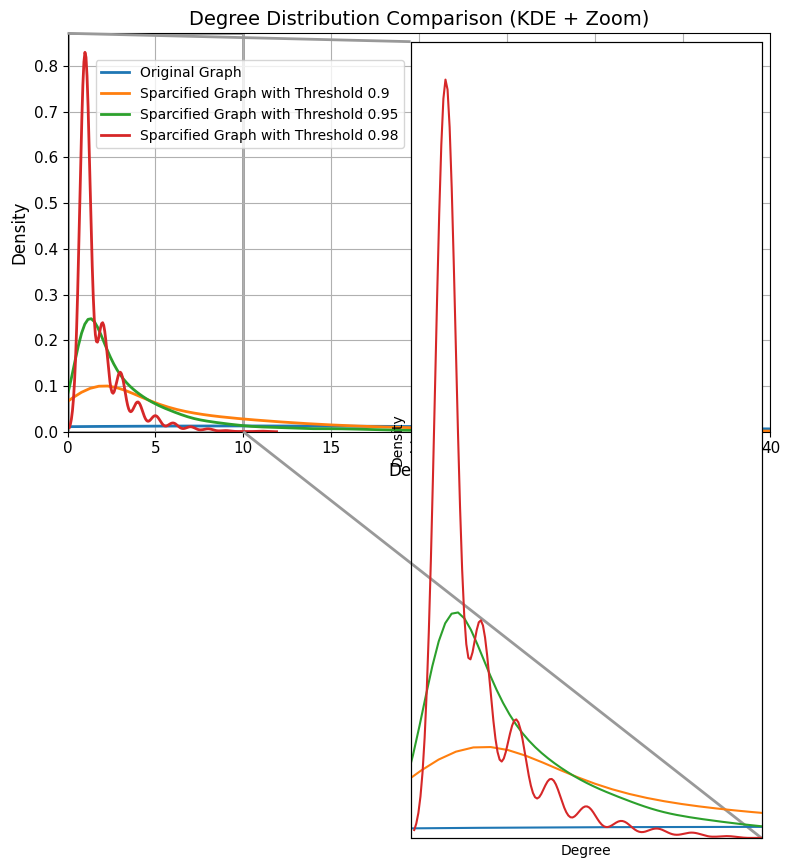

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# ✅ Create figure
plt.figure(figsize=(8, 5))

ax = plt.axes()
ax.set_title('Degree Distribution Comparison (KDE + Zoom)', fontsize=14)
ax.set_xlabel('Degree', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# ✅ Main KDE Curve
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['Degree'], label=label, linewidth=2, ax=ax)

# ✅ Set x-limit for the main plot
ax.set_xlim(0, 40)

# ✅ Inset
axins = zoomed_inset_axes(ax, zoom=2, loc='upper right', borderpad=0.6)
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['Degree'], linewidth=1.5, ax=axins)

# ✅ Set zoom area
axins.set_xlim(0, 10)  # adjust based on your data
axins.set_ylim(0, None)

# ✅ Remove labels in inset
axins.set_xticks([])
axins.set_yticks([])

# ✅ Style inset box
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(0.8)

# ✅ Connect inset to main plot
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.6", linewidth=2)

# ✅ Better legend position
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(0.03, 0.95))

# ✅ Grid and Layout
ax.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-53-dacb51d5085a>:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


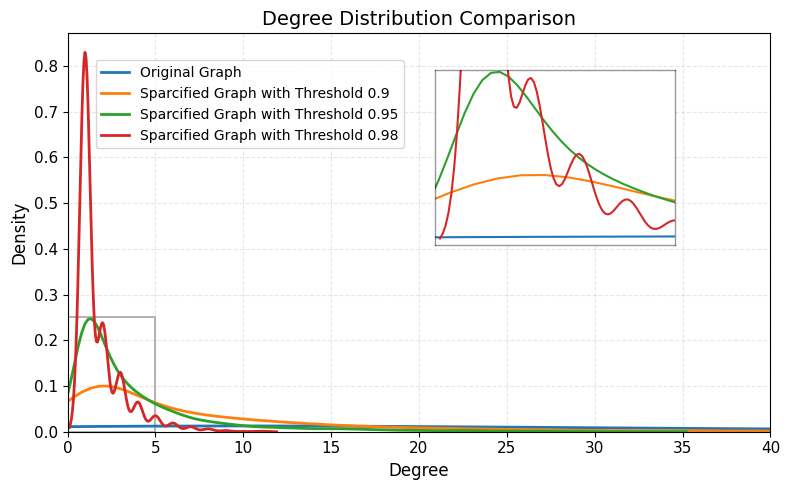

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import seaborn as sns

# --- Data ---
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.set_title('Degree Distribution Comparison', fontsize=14)
ax.set_xlabel('Degree', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# --- Main KDE plot ---
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['Degree'], label=label, linewidth=2, ax=ax)

ax.set_xlim(0, 40)
ax.grid(True, linestyle='--', alpha=0.3)

# --- Rectangle (Zoom area) ---
x1, x2 = 0, 5
y1, y2 = 0, 0.25
rect = Rectangle((x1, y1), x2 - x1, y2 - y1,
                 linewidth=1.2, edgecolor='gray', facecolor='none', alpha=0.7)
ax.add_patch(rect)

# --- Zoomed Plot (Manual Inset) ---
axins = plt.axes([0.55, 0.5, 0.3, 0.35])  # [left, bottom, width, height]
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['Degree'], linewidth=1.5, ax=axins)

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# ✅ Clean Inset (Journal Style)
axins.set_xticks([])
axins.set_yticks([])
axins.tick_params(left=False, bottom=False)
axins.set_xlabel("")
axins.set_ylabel("")
for spine in axins.spines.values():
    spine.set_linewidth(1.0)
    spine.set_alpha(0.4)

# --- Connectors (Journal Style) ---
# Connectors will now properly link rectangle and inset

# --- Legend ---
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(0.03, 0.95))

plt.tight_layout()
plt.show()

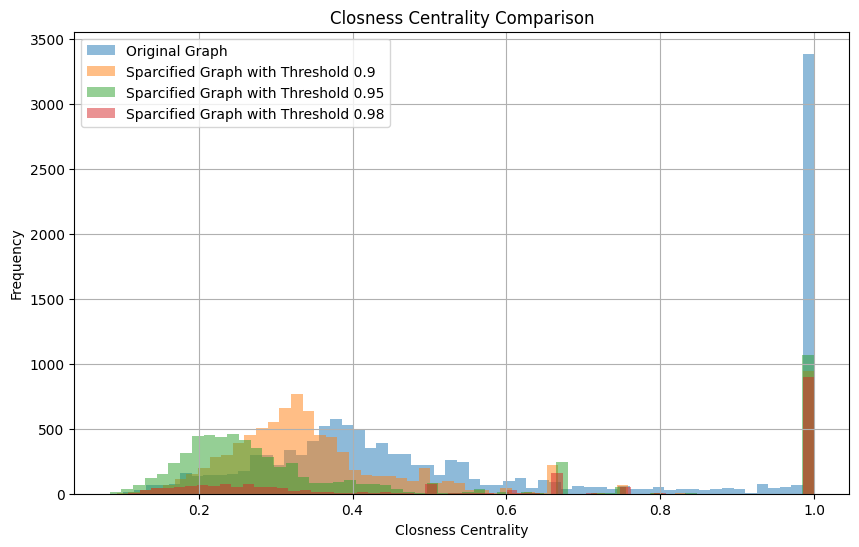

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['closnesscentrality'], bins=60, alpha=0.5, label=label)

plt.title('Closness Centrality Comparison')
plt.xlabel('Closness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

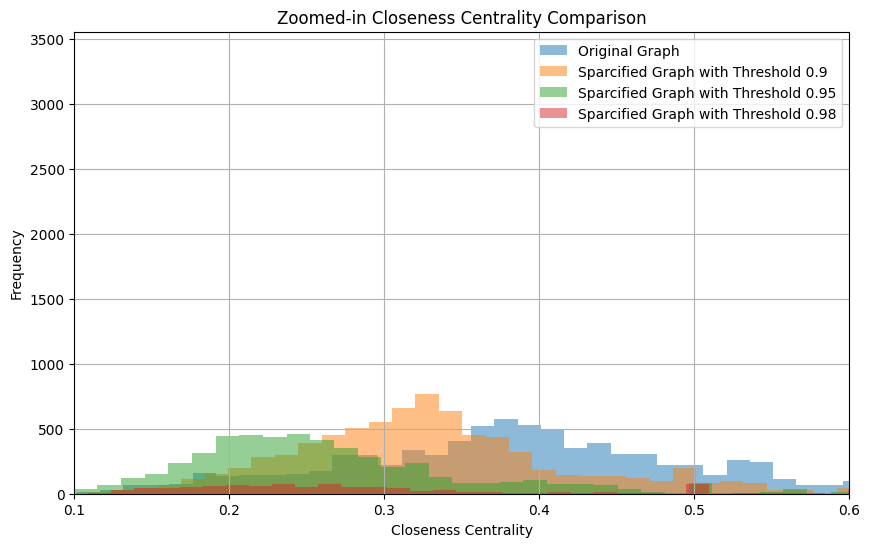

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting closeness centrality for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['closnesscentrality'], bins=60, alpha=0.5, label=label)

# Zoom into a specific region of closeness centrality (e.g., 0 to 0.6)
plt.xlim(0.1, 0.6)

plt.title('Zoomed-in Closeness Centrality Comparison')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


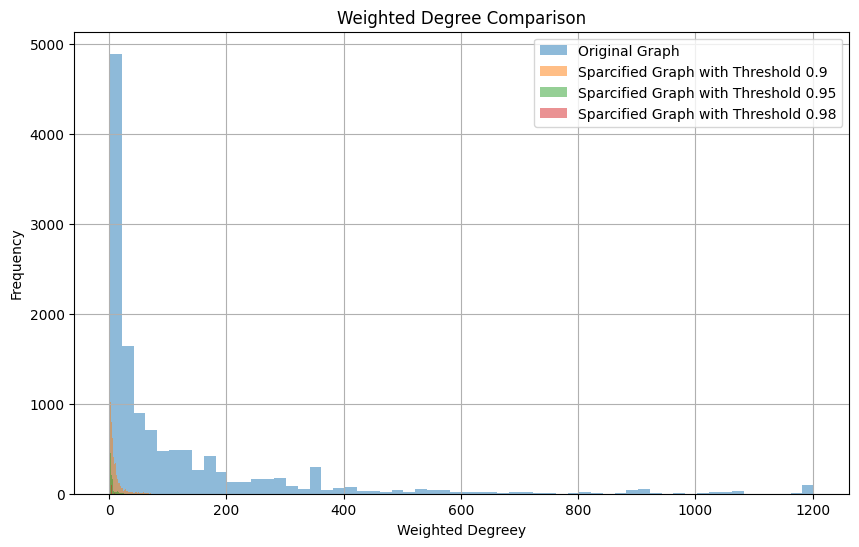

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Weighted Degree'], bins=60, alpha=0.5, label=label)

plt.title('Weighted Degree Comparison')
plt.xlabel('Weighted Degreey')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

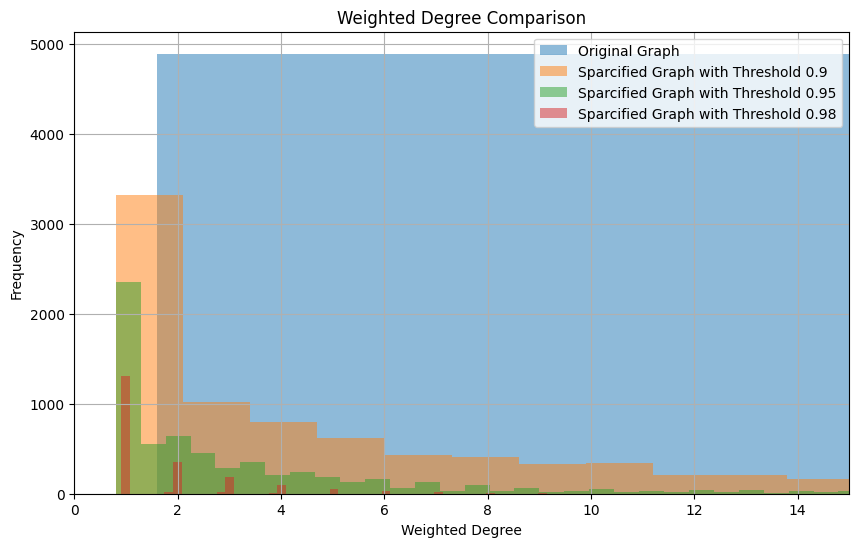

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting weighted degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Weighted Degree'], bins=60, alpha=0.5, label=label)

# Optional: Zooming in by limiting x-axis range
plt.xlim(0, 15)  # Adjust the range based on your data to zoom into a specific area

plt.title('Weighted Degree Comparison')
plt.xlabel('Weighted Degree')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()




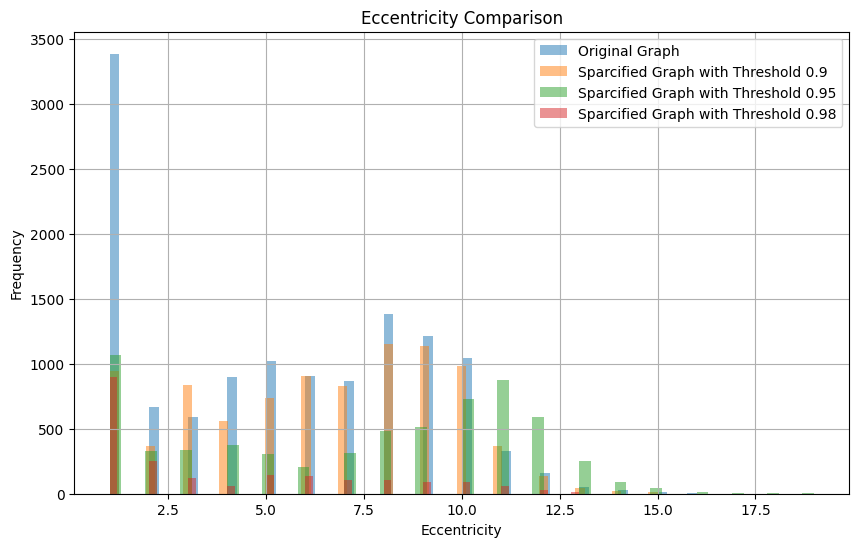

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Eccentricity'], bins=60, alpha=0.5, label=label)

plt.title('Eccentricity Comparison')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

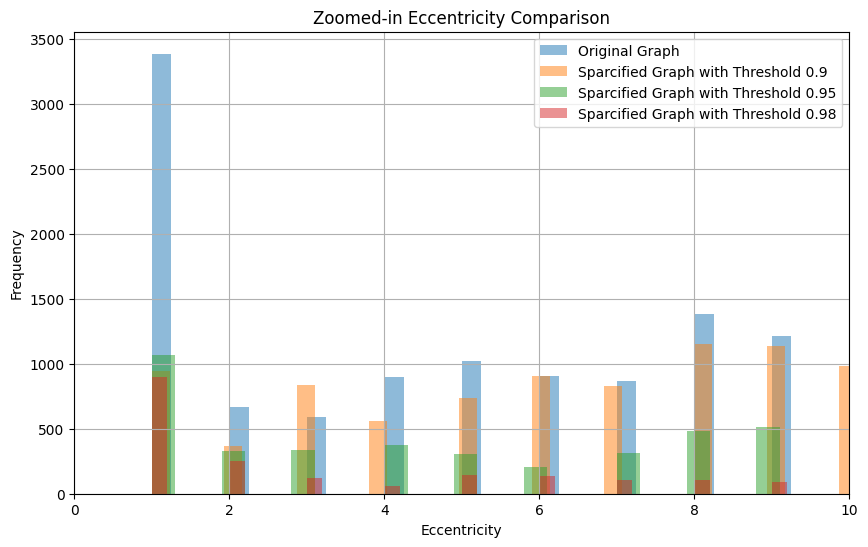

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting eccentricity distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['Eccentricity'], bins=60, alpha=0.5, label=label)

# Add zoom by limiting x-axis range if needed
plt.xlim(0, 10)  # Adjust this range based on the area you want to zoom into

plt.title('Zoomed-in Eccentricity Comparison')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


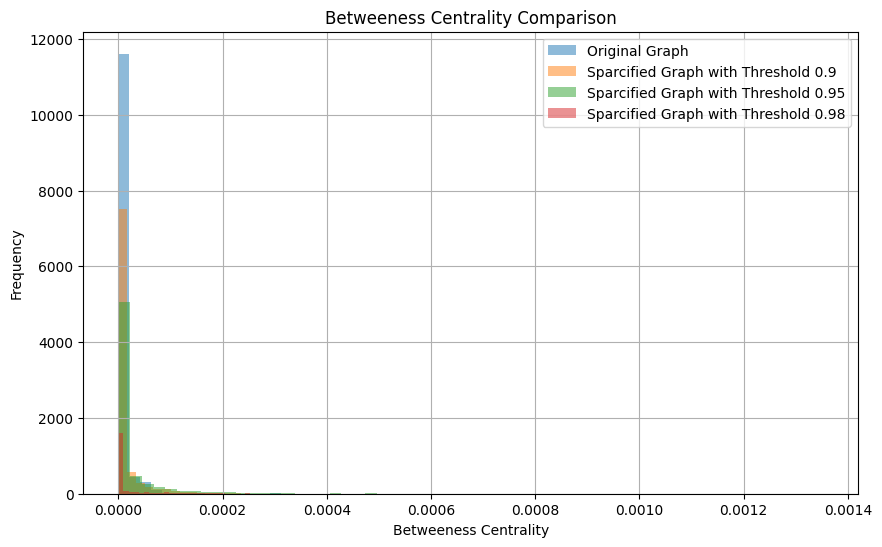

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['betweenesscentrality'], bins=60, alpha=0.5, label=label)

plt.title('Betweeness Centrality Comparison')
plt.xlabel('Betweeness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

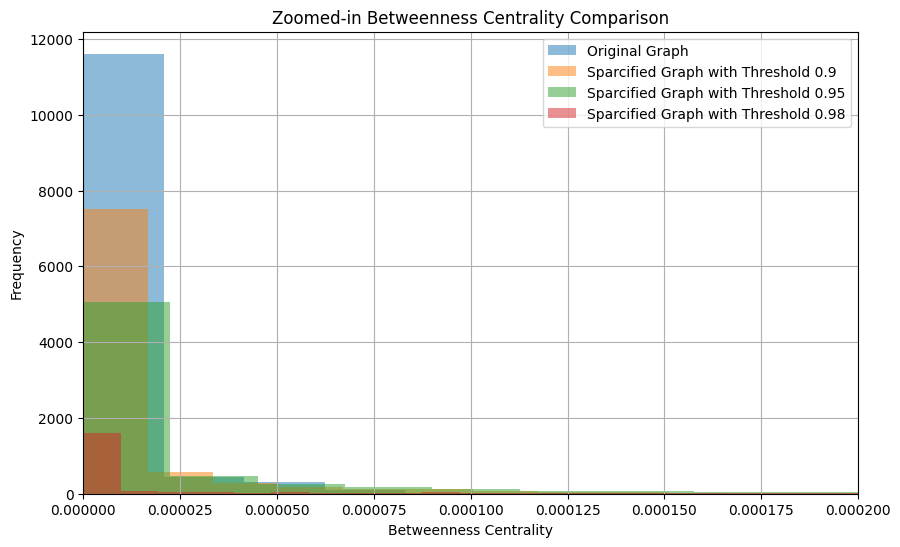

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting betweenness centrality distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['betweenesscentrality'], bins=60, alpha=0.5, label=label)

# Zooming in by limiting x-axis range for better visibility
plt.xlim(0, 0.0002)  # Adjust this value based on where you want to zoom in

plt.title('Zoomed-in Betweenness Centrality Comparison')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-12-b8bc7387c71d>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


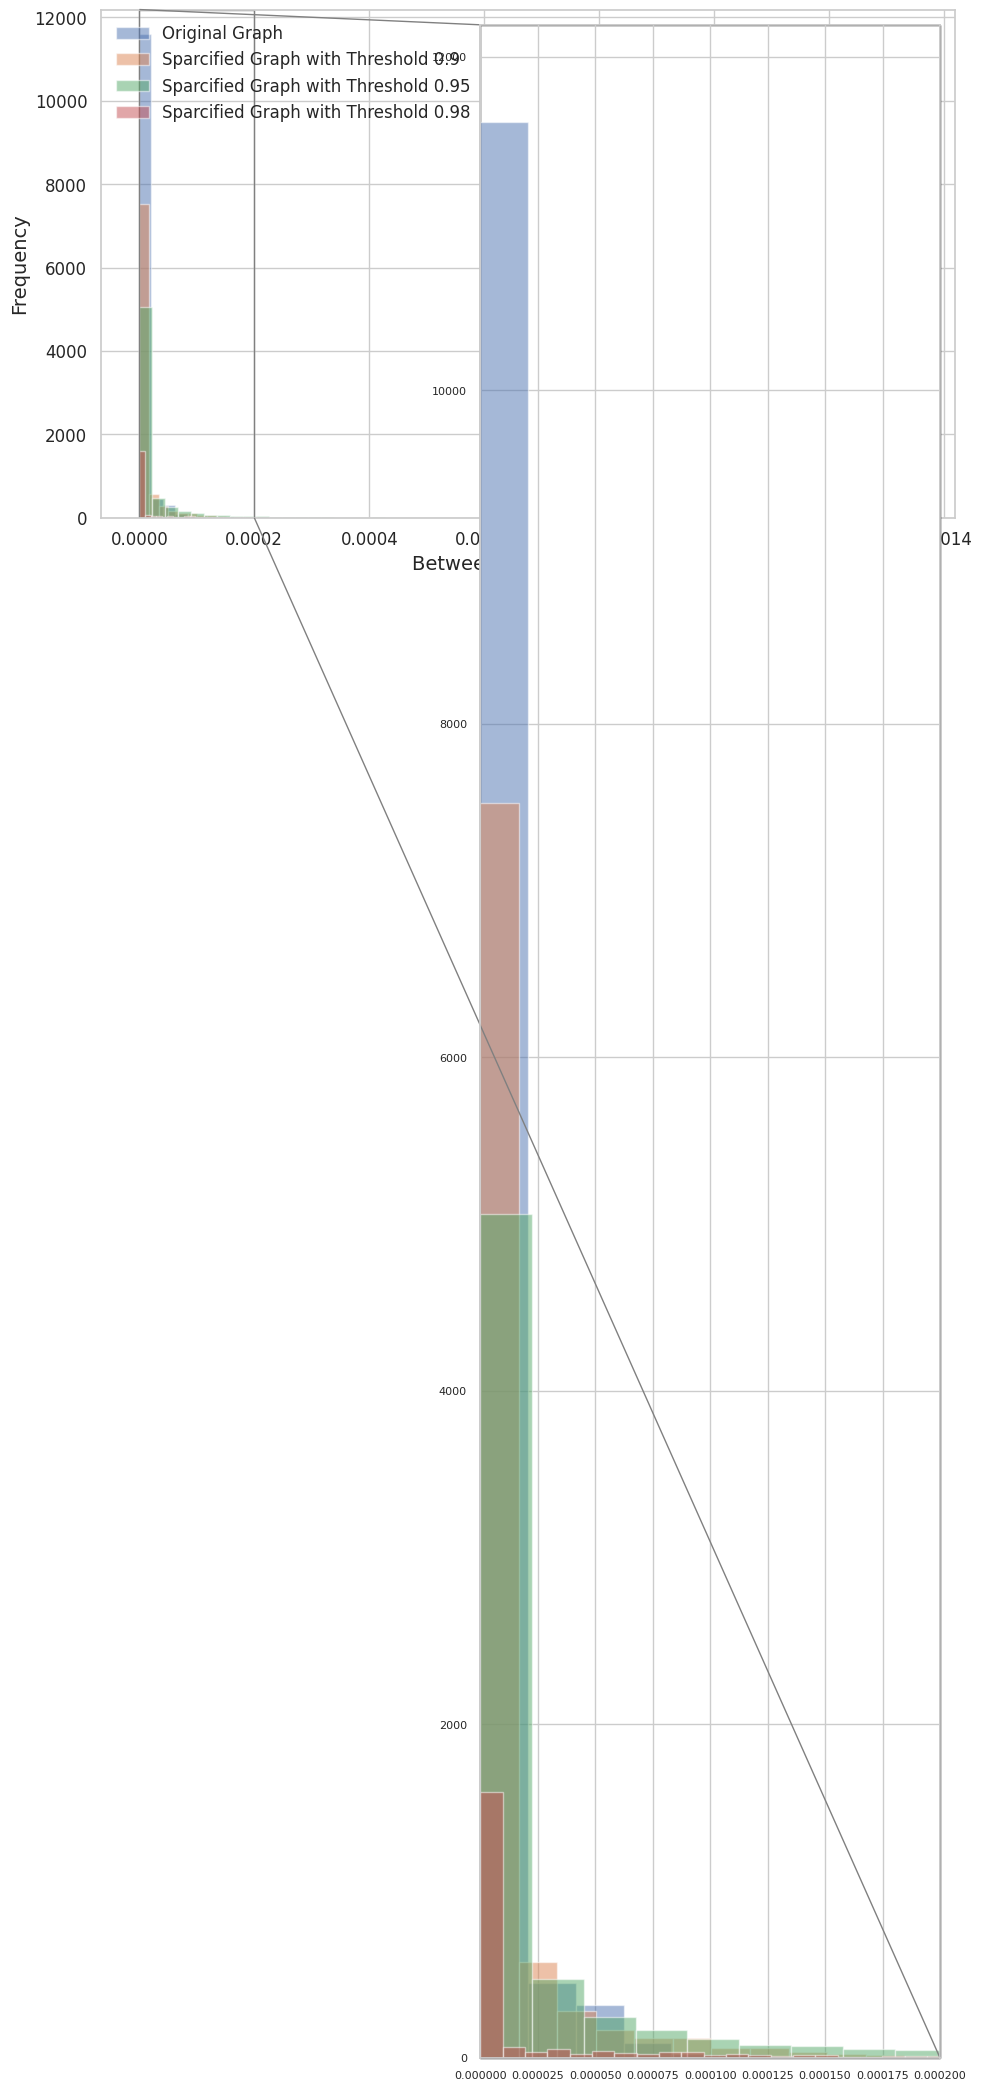

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# ✅ Create balanced figure
plt.figure(figsize=(10, 6))
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

ax = plt.axes()
ax.set_xlabel('Betweenness Centrality', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Main histogram (distribution)
for label, filename in files.items():
    df = pd.read_csv(filename)
    ax.hist(df['betweenesscentrality'], bins=60, alpha=0.5, label=label)

# ✅ Inset with zoom
axins = zoomed_inset_axes(ax, zoom=4, loc='upper right', borderpad=1)

for label, filename in files.items():
    df = pd.read_csv(filename)
    axins.hist(df['betweenesscentrality'], bins=60, alpha=0.5, label=label)

# ✅ Focus zoom where you wanted
axins.set_xlim(0, 0.0002)
axins.set_ylim(0, None)  # Auto height

# Inset style
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(1)
axins.tick_params(axis='both', labelsize=8)

# Connect inset to main plot
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=1)

# ✅ Legend outside the zoom region
ax.legend(fontsize=12, loc='upper left', frameon=False)

plt.tight_layout()

# Save
plt.savefig("BetweennessCentrality_WithZoom.png", dpi=300, bbox_inches='tight')
plt.savefig("BetweennessCentrality_WithZoom.svg", format="svg", bbox_inches='tight')

plt.show()


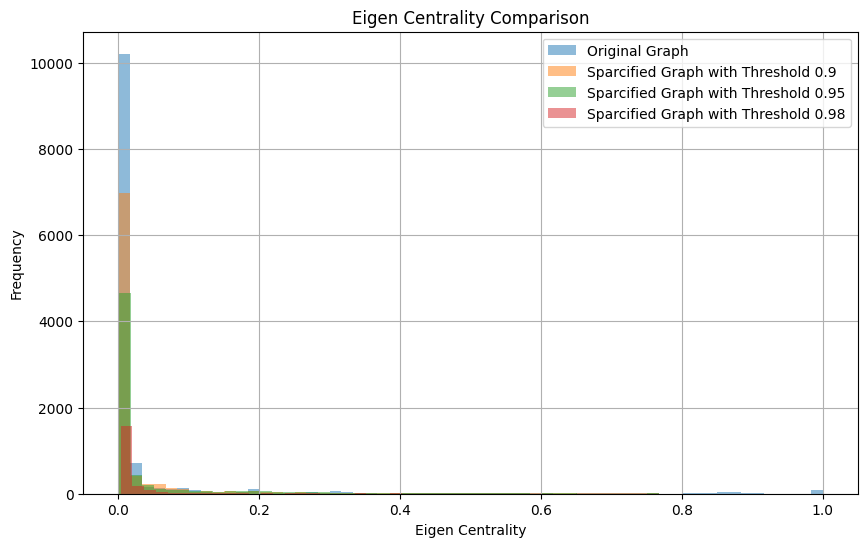

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting degree distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['eigencentrality'], bins=60, alpha=0.5, label=label)

plt.title('Eigen Centrality Comparison')
plt.xlabel('Eigen Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-4-d7b25445757f>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


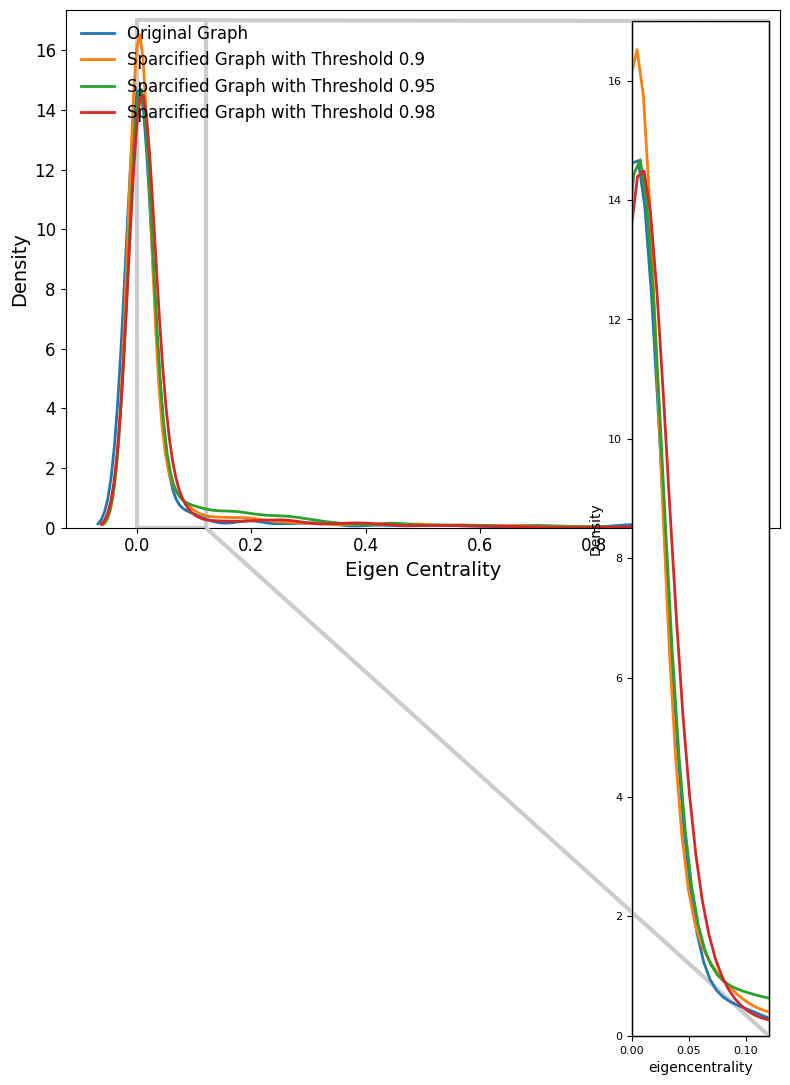

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# ✅ Balanced figure size for KDE + inset
plt.figure(figsize=(8, 6))
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

ax = plt.axes()
ax.set_xlabel('Eigen Centrality', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# KDE Plot (Main)
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['eigencentrality'], label=label, linewidth=2, ax=ax)

# ✅ Small and controlled inset
axins = zoomed_inset_axes(ax, zoom=2, loc='upper right', borderpad=0.8)

for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['eigencentrality'], linewidth=2, ax=axins)

# ✅ Focused zoom
axins.set_xlim(0, 0.12)
axins.set_ylim(0, 17)

# Inset style
axins.tick_params(axis='both', labelsize=8)
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(1)

# ✅ Better connector positions
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.8", linewidth=3)

# ✅ Legend nicely positioned
ax.legend(fontsize=12, loc='upper left', frameon=False)

plt.tight_layout()

# Save high-quality output
plt.savefig("EigenCentrality_FinalPolished.svg", format="svg", bbox_inches='tight')
plt.savefig("EigenCentrality_FinalPolished.png", dpi=300, bbox_inches='tight')

plt.show()




<ipython-input-8-3a9867f06a6d>:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


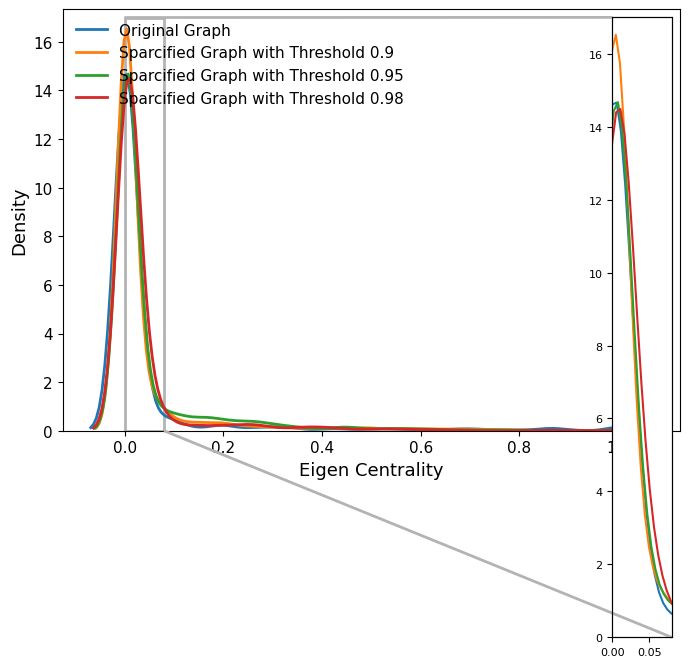

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# ✅ Better figure balance
plt.figure(figsize=(7, 5))
matplotlib.rc('xtick', labelsize=11)
matplotlib.rc('ytick', labelsize=11)

ax = plt.axes()
ax.set_xlabel('Eigen Centrality', fontsize=13)
ax.set_ylabel('Density', fontsize=13)

# KDE Plot (Main)
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['eigencentrality'], label=label, linewidth=2, ax=ax)

# ✅ Improved inset: smaller, clearer, no clutter
axins = zoomed_inset_axes(ax, zoom=1.5, loc='upper right', borderpad=0.6)
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['eigencentrality'], linewidth=1.5, ax=axins)

# ✅ More balanced zoom range
axins.set_xlim(0, 0.08)
axins.set_ylim(0, 17)

# ✅ Cleaner inset (no axis labels, just ticks)
axins.tick_params(axis='both', labelsize=8)
axins.set_xlabel('')
axins.set_ylabel('')

# ✅ Clean inset border
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(0.8)

# ✅ Better connector lines
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.7", linewidth=2)

# ✅ Well placed legend
ax.legend(fontsize=11, loc='upper left', frameon=False)

plt.tight_layout()

# Save
plt.savefig("EigenCentrality_Cleaned.svg", format="svg", bbox_inches='tight')
plt.savefig("EigenCentrality_Cleaned.png", dpi=300, bbox_inches='tight')

plt.show()


<ipython-input-9-18cde65b1744>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


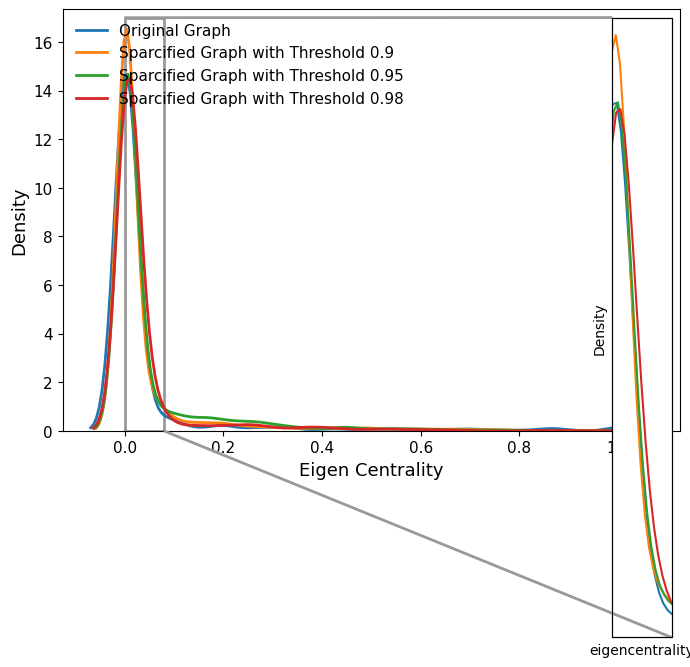

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# ✅ Plot
plt.figure(figsize=(7, 5))
matplotlib.rc('xtick', labelsize=11)
matplotlib.rc('ytick', labelsize=11)

ax = plt.axes()
ax.set_xlabel('Eigen Centrality', fontsize=13)
ax.set_ylabel('Density', fontsize=13)

# ✅ Main KDE plot
for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['eigencentrality'], label=label, linewidth=2, ax=ax)

# ✅ Inset without labels
axins = zoomed_inset_axes(ax, zoom=1.5, loc='upper right', borderpad=0.6)

for label, filename in files.items():
    df = pd.read_csv(filename)
    sns.kdeplot(df['eigencentrality'], linewidth=1.5, ax=axins)

axins.set_xlim(0, 0.08)
axins.set_ylim(0, 17)

# ✅ Remove inset axis labels (but keep small ticks)
axins.set_xticks([])
axins.set_yticks([])

# ✅ Subtle inset styling
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(0.8)

# ✅ Better connector
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.6", linewidth=2)

# ✅ Legend without frame
ax.legend(fontsize=11, loc='upper left', frameon=False)

plt.tight_layout()

# ✅ Save figure
plt.savefig("EigenCentrality_Refined.svg", format="svg", bbox_inches='tight')
plt.savefig("EigenCentrality_Refined.png", dpi=300, bbox_inches='tight')

plt.show()


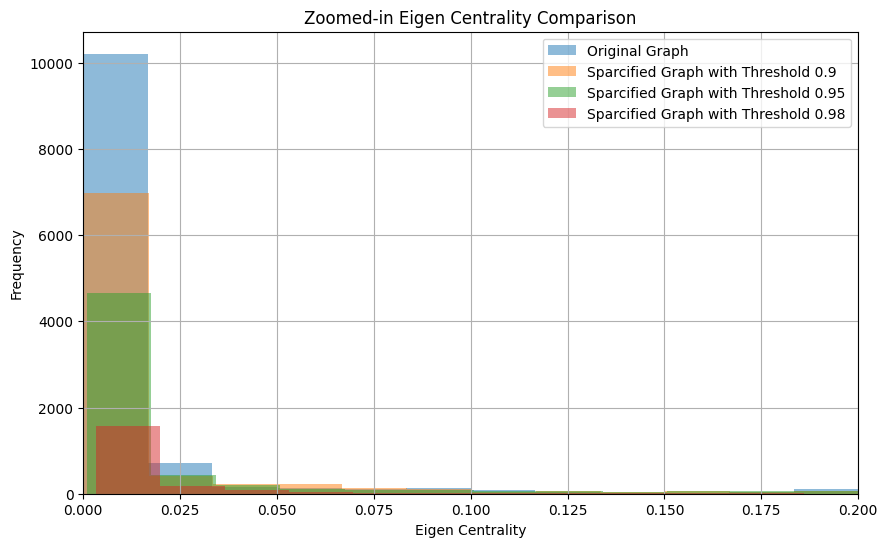

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

# Create a figure
plt.figure(figsize=(10, 6))

# Plotting eigen centrality distribution for each file
for label, filename in files.items():
    df = pd.read_csv(filename)
    plt.hist(df['eigencentrality'], bins=60, alpha=0.5, label=label)

# Optional: Zooming in by limiting x-axis range
plt.xlim(0, 0.2)  # Adjust the range based on your data to zoom into a specific area

plt.title('Zoomed-in Eigen Centrality Comparison')
plt.xlabel('Eigen Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-13-31d541d9fc55>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


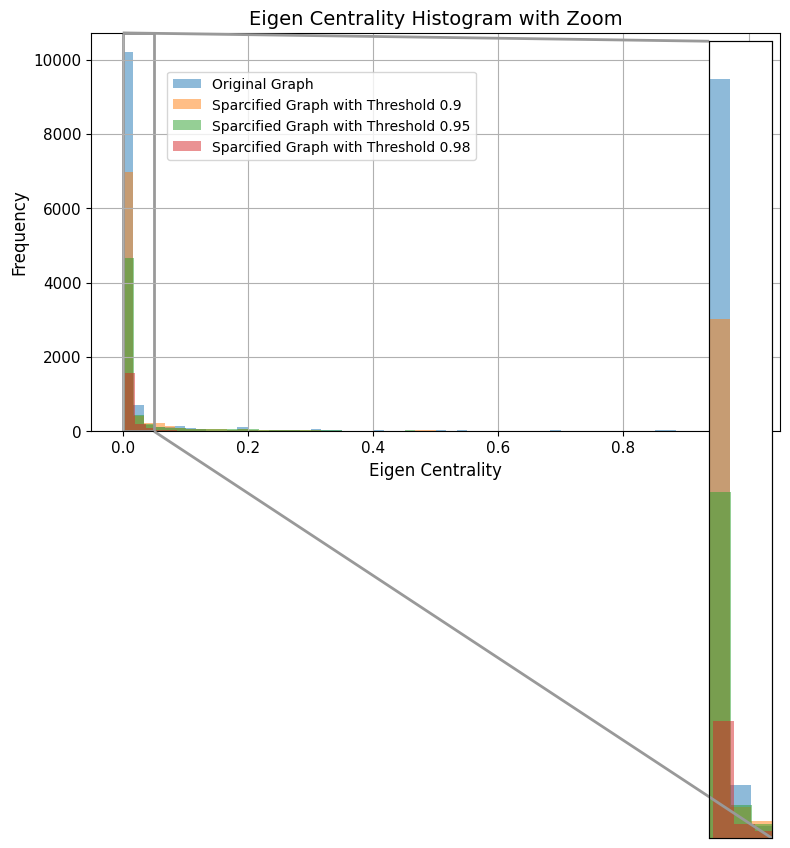

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Load datasets
files = {
    'Original Graph': 'Nodes_Original.csv',
    'Sparcified Graph with Threshold 0.9': 'Nodes_0.9.csv',
    'Sparcified Graph with Threshold 0.95': 'Nodes_0.95.csv',
    'Sparcified Graph with Threshold 0.98': 'Nodes_0.98.csv'
}

plt.figure(figsize=(8, 5))

ax = plt.axes()
ax.set_title('Eigen Centrality Histogram with Zoom', fontsize=14)
ax.set_xlabel('Eigen Centrality', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Plot
for label, filename in files.items():
    df = pd.read_csv(filename)
    ax.hist(df['eigencentrality'], bins=60, alpha=0.5, label=label)

# Inset Zoom
axins = zoomed_inset_axes(ax, zoom=2, loc='upper right', borderpad=0.6)
for label, filename in files.items():
    df = pd.read_csv(filename)
    axins.hist(df['eigencentrality'], bins=60, alpha=0.5)

axins.set_xlim(0, 0.05)
axins.set_ylim(0, None)
axins.set_xticks([])
axins.set_yticks([])
axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(0.8)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.6", linewidth=2)

# ✅ Legend moved left using bbox_to_anchor
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(0.1, 0.92))


ax.grid(True)
plt.tight_layout()
plt.show()



In [2]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/InverseLinkPredcition')

Mounted at /content/drive
